<a href="https://colab.research.google.com/github/aSafarpoor/NLP-HW2/blob/main/NLP_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

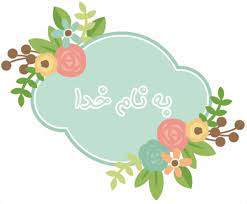

<center> NLP </center>
<center> HW-2 </center>
<br>
<center> Text Preprocessing </center>

Selected text is English.
<br>It is Friends series dialogues.
<br>Used link as a source is: https://fangj.github.io/friends/

<div dir=rtl>
در این پروژه سعی شده است که با دریافت مکالمات بازیگران اصلی فیلم friends تلاش شده است که با تمیز کردن داده‌های موجود انواع تسک‌های موجود برای پیش‌پردازش را اعمال نماییم.

همچنین در ادامه سعی شده است تا برخی تسک‌های ممکن با توجه به دانش و ابزار 
در دسترس پیاده سازی گردند.

در ادامه توضیحات بخش‌های مختلف و اهداف آن آورده شده است.
</div>




# Used library

<div dir=rtl>

</div>

<div dir=rtl>
در بین کتابخانه هایی که در ادامه آورده شده است اکثر موارد در داکیومنت آورده شده اند.
</div>

In [3]:
import urllib.request as urllib
import re
import matplotlib.pyplot as plt
import nltk
import pandas as pd 
from nltk import word_tokenize,sent_tokenize
import string
from nltk import ngrams

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix

In [4]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Read and struct data

<div dir=rtl>
در لینک نوشته شده متن تمامی مکالمات این سریال آورده شده است.
برای هریک از قسمت ها به صورت جداگانه آورده شده است و در نتیجه به صورت دستی لیست شماره قسمت‌ها آورده شده اند و در ادامه برای ساخت آدرس url آن استفاده خواهند شد.

لیست بعدی اسامی بازیگران این فیلم است که شامل شش شخصیت اصلی آن یعنی ریچل و چندلر و جویی و مونیکا و راس و فیبی می باشد.


</div>

In [5]:
firstpartofurl = 'https://fangj.github.io/friends/season/'
secondpartofurl = {}
secondpartofurl[1] = list(range(101,125))
secondpartofurl[2] = list(range(201,225))
secondpartofurl[3] = list(range(301,326))
secondpartofurl[4] = list(range(401,424))
secondpartofurl[5] = list(range(501,524))
secondpartofurl[6] = list(range(601,625))
secondpartofurl[7] = list(range(701,725))
secondpartofurl[8] = list(range(801,824))
secondpartofurl[9] = list(range(901,923))
secondpartofurl[10] = list(range(1001,1017))

name_actors = ['Rachel','Chandler','Joey','Monica','Ross','Phoebe']

<div dir=rtl>
در این قسمت نیز برای قسمت‌های مختلف آدرس url ها تولید می‌شود و در ادامه نیز با بررسی ورودی‌ها انجام شده و برای افراد مختلف استخراج گردیده است.

توجه شود در این بخش برخی url ها وجود ندارند اما استثنائی قائل نشدیم و در نتیحه اینجا برخی موارد را نمی‌تواند دریافت نماید.
</div>


In [6]:
name_actors = ['Rachel','Chandler','Joey','Monica','Ross','Phoebe']
speaker_names = []
data_based_on_season_and_user = {}
data_based_on_season_and_user["Rachel"] = []
data_based_on_season_and_user["Chandler"] = []
data_based_on_season_and_user["Joey"] = []
data_based_on_season_and_user["Monica"] = []
data_based_on_season_and_user["Ross"] = []
data_based_on_season_and_user["Phoebe"] = []
t = f = 0
for season in range(1,11):
    print(" season = " ,season)
    for i in secondpartofurl[season]:
      if i<1000:
        url = firstpartofurl+'0'+str(i)+'.html'
      else:
        url = firstpartofurl+str(i)+'.html'
      
      try:
        data = urllib.urlopen(url)
      except:
        print("not found ",url)
      
      
      for line in data: # files are iterable
        try:
          sline = line.decode("utf-8")
        except:
          continue

        try:
          if '<p><b>' in sline:
              user = re.findall('[a-zA-Z]+:</b>',sline)
              note = re.findall('</b>.+',sline)
              user = user[0]
              note = note[0]
              try:
                data_based_on_season_and_user[user[:-5]].append(note[4:-4])
              except:
                if user[:-5] not in speaker_names:
                  speaker_names.append(user[:-5])
          t+=1
        except:
          f+=1
          # pass
print(t,f)

 season =  1
 season =  2
not found  https://fangj.github.io/friends/season/0212.html
not found  https://fangj.github.io/friends/season/0213.html
 season =  3
 season =  4
 season =  5
 season =  6
not found  https://fangj.github.io/friends/season/0615.html
not found  https://fangj.github.io/friends/season/0616.html
 season =  7
not found  https://fangj.github.io/friends/season/0724.html
 season =  8
 season =  9
 season =  10
155715 643


<div dir=rtl>
البته برای افراد مختلف دیگری نیز مکالمات وجود دارند که از نمونه این افراد موارد زیر را می‌توان نام برد.
</div>

In [7]:
speaker_names[2:7]

['Marsha', 'Carol', 'Geller', 'Susan', 'Barry']

<div dir=rtl>
در این دسته موارد اطلاعات افراد اصلی که استخراج شده اند در حدود ۹۵ درصد این موارد بوده است.
</div>

In [8]:
print("percentage of exported info" , round(149208/(149208+7150)*100,2))

percentage of exported info 95.43


<div dir=rtl>
از نظر تعداد مواردی که هر فرد صحبت کرده است نمودار زیر تهیه گردیده است که قابل مشاهده است  ریچل  بیشترین میزان سخن را داشده و فیبی کمترین میزان بوده است.
همچنین با توجه به جنسیت افراد ستون های نمودا به دو رنگ نمایش داده شده اند.

همچنین نمودار دایره‌ای فراوانی فوق نیز رسم گردیده است.
</div>

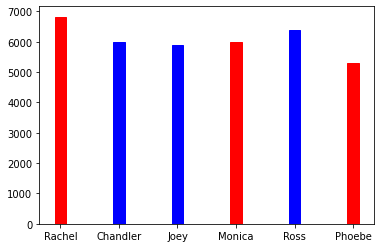

In [9]:
name = []
val = []
for key in data_based_on_season_and_user.keys():
  name.append(key)
  val.append(len(data_based_on_season_and_user[key]))
  # print(key," : ",len(data_based_on_season_and_user[key]))
p = plt.bar(name,val,width=0.2)
p[0].set_color('r')
p[1].set_color('b')
p[2].set_color('b')
p[3].set_color('r')
p[4].set_color('b')
p[5].set_color('r')
plt.show()

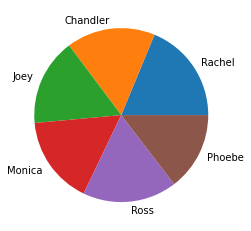

In [10]:
plt.pie(labels=name, x =val)
plt.show()

# Tokenization

<div dir=rtl>
یکی از بخش‌های مهمی که در آماده سازی اطلاعات و متون وجود دارد بحث توکنایزیشن هست. برای این بخش از کتاب خانه ان-ال-تی-کی استفاده شده است که
این ابزار را به صورت آماده دارد. برای این کار یک تابع تهیه گردیده که بنا به انتخاب کاربر قابلیت بازگردانی متن به صورت توکنایز شده بر اساس کلمات و بر اساس جملات را دارد.

در ادامه نمونه‌هایی از این موارد چاپ شده اند.
</div>

In [11]:
# based of GeeksForGeeks: 
### https://www.geeksforgeeks.org/tokenize-text-using-nltk-python/
#just as an example / we will see its usage in next part
#from nltk.tokenize import word_tokenize,sent_tokenize

def tokenizer(sentence,word_tokenizing=True,sent_tokenizer=True):
      if not sent_tokenizer:
         return word_tokenize(sentence)
      try:
        sent_tok = sent_tokenize(sentence)
      except:
        nltk.download('punkt')
        sent_tok = sent_tokenize(sentence)
      if word_tokenizing:
        word_tok = word_tokenize(sentence)
        return sent_tok , word_tok
      return sent_tok

In [12]:
tokened_sample = tokenizer(data_based_on_season_and_user['Rachel'][1])
for t in tokened_sample:
  print(t)

[' Are you kidding?', "I'm trained for nothing!", 'I was laughed out of tw']
['Are', 'you', 'kidding', '?', 'I', "'m", 'trained', 'for', 'nothing', '!', 'I', 'was', 'laughed', 'out', 'of', 'tw']


#preprocessing

<div dir=rtl>
در عنوان این تمرین بر پیش پردازش‌ها تاکید زیادی شده است. همچنین از موارد موجود در نوت-پد مربوط به خود درس استفاده گردیده شده است.

توابع مختلفی برای این بخش قابل استفاده اند. در ادامه به معرفی هر یک از توابع نیز خواهیم پرداخت:
</div>

<div dir=rtl>
این تابع در راستای حذف علامت های پانکچوئیشن و غیرالفبایی استفاده گردیده و منبع آن نیزذکر شده است.
</div>

In [13]:
'''remove un-alphabetic characters / here we remove punctuation  marks too'''
# based of stackoverflow
def remove_punctuation(note):
  note = note.replace("...")
  clear_note = regex.sub(' ', note)
  return clear_note

<div dir=rtl>
در این بخش نیز تلاش شده تا تنها داده ‌های الفبایی حفظ شوند چرا که سایر داده ها عملا در تسک های مدنظر ما کاربردی ندارند.
</div>

In [14]:
'''remove un-alphabetic characters / here we remove punctuation  marks too'''
# based of stackoverflow
def remove_non_alphabetic(note):
  regex = re.compile('[^a-zA-Z]')
  clear_note = regex.sub(' ', note)
  return clear_note

<div dir=rtl>
یکی از تسک های معروف در زمینه پیش پردازش متون انگلیسی بحث همگن سازی حروف از نظر یزرگ و کوچک بودن است که در ادامه مدیریت شده است.
</div>

In [15]:
'''lowercase characters'''
def lower_case_of_list(inlist):
  out = [x.lower() for x in inlist]
  return out

<div dir=rtl>
در هر زبانی یک سری کلمات وجود دارند که فراوانی تکرار بالایی دارند اما از نظر بار معنایی چندان قوی نیستند و از این منظر می‌توان در یک مرحله از پیش پردازش این کلمات را که یک نمونه لیست شده آن در ان-ال-تی-کی وجود دارد را از متن حذف نماییم.

البته توجه شود در برخی موارد این تسک مفید نیست و نباید انجام شود که نمونه هایی از آن در ادامه دیده خواهند شد.
</div>

In [16]:
'''clear stopwords and not clear words such as singulars'''
# mainly based on https://github.com/language-ml/1-nlp-exploring-datasets/blob/main/notebooks/
def stopword_removal(note_list):
  try:
    stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
  except:
    nltk.download('stopwords')
    stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]

  out_list = []
  for note in note_list:
    new = ""
    for word in note.split():
      if len(word) != "":
         if word not in stopwords:
            new+=word[:] + " "
    out_list.append(new)
  return out_list
# print(stopword_removal(['how you doing ali','are you ok ali']))

<div dir=rtl>
این مورد یکی دیگر از مواردی است که در برخی تسک ها که به بررسی معنایی میپردازند اهمیت می‌یابد و در طی آن کلماتی که تک حرفی یا دوحرفی باشند را مستعد معنا نداسته و حدف نماییم.
</div>

In [17]:
'''  clear_less_than_three which is mostly useless or meaning less '''
def clear_less_than_three(note):
  out = ""
  for word in note.split():
    if len(word)>2:
      out += word+ " "
  return out

<div dir=rtl>
در تکه کدی که در ادامه آورده شده است استفاده از توابع معرفی شده فوق را مشاهده می‌نمایید که با توجه به تنوع نیاز ها در دو دسته با کلمات stopword و بدون آن تهیه گردیده است.
</div>

In [18]:
alphabetic_dictionary_with_stopwords = {}
alphabetic_dictionary_without_stopwords = {}
for key in data_based_on_season_and_user.keys():
  sub_list_temp = []
  for note in data_based_on_season_and_user[key]:
    non_alph_note = remove_non_alphabetic(note) # remove un-alphabetic characters
    cleared_shorts = clear_less_than_three(non_alph_note)
    sub_list_temp.append(cleared_shorts[:])
   
  sub_list_temp = lower_case_of_list(sub_list_temp)[:] # lowercase
  alphabetic_dictionary_with_stopwords[key] = sub_list_temp[:]
  
  sub_list_temp = stopword_removal(sub_list_temp)
  alphabetic_dictionary_without_stopwords[key] = sub_list_temp[:]

<div dir=rtl>
مشخصا اولین گام برای آشنایی با متن و تلاش برای آن تحلیل های آماری ساده مانند شمارش فراوانی ها می‌باشد.

در ادامه طول میانگین طول جملات هر فرد با stopword و بدون آن محاسبه گردیده است.

همچنین میانگین طول کلمات  و فراوانی تعداد کلمات هر فرد با طول بین ۱۰ تا ۱۴ و همچنین دسته بیش از ۱۵ حرفی آورده شده است.
</div>

In [19]:
statistics = {}
for name in name_actors:
  
  sentense_len_with = 0
  sentense_len_without = 0
  counter_sent_with = 0
  counter_sent_without = 0

  word_len_without = 0
  counter_word_without = 0
  word_10_14 = 0
  word_15_   = 0

  for note in alphabetic_dictionary_with_stopwords[name]:
    sent_tok , word_tok = tokenizer(note)
    sentense_len_with += len(word_tok)
    counter_sent_with += len(sent_tok)

  for note in alphabetic_dictionary_without_stopwords[name]:
    sent_tok , word_tok = tokenizer(note)
    sentense_len_without += len(word_tok)
    counter_sent_without += len(sent_tok)

    for word in word_tok:
      word_len_without += len(word)
      if len(word)>=10:
        if len(word)<=14:
          word_10_14+=1
        else:
          word_15_+=1

    counter_word_without += len(word_tok)
  
  statistics[name] = [round(100 * (sentense_len_with-sentense_len_without)/sentense_len_with,2),
                      round(sentense_len_with/counter_sent_with,2), 
                      round(sentense_len_without/counter_sent_without,2),
                      round(word_len_without/counter_word_without,2), 
                      word_10_14,
                      word_15_,
                      round(100*(word_10_14+word_15_)/counter_word_without,2)]

# print( name ,':' ,end = " ")
'''
print("percentage_of_stop_words",
        "mean lenght of sentences with stop words" , 
        "mean lenght of sentences without stop words",
        "mean lenght of words",
        "number of long words in different size")'''
statistics 

{'Chandler': [39.17, 6.03, 3.83, 4.96, 423, 4, 1.97],
 'Joey': [37.74, 6.33, 4.05, 4.86, 329, 6, 1.46],
 'Monica': [40.27, 5.9, 3.69, 4.97, 350, 4, 1.71],
 'Phoebe': [38.75, 6.13, 3.88, 4.91, 358, 5, 1.86],
 'Rachel': [38.67, 5.96, 3.8, 4.85, 389, 6, 1.63],
 'Ross': [38.34, 6.04, 3.87, 4.97, 482, 7, 2.11]}

<div dir=rtl>
با توجه به محاسبات فوق یک جدول تهیه گردیده است که در آن به ترتیب ستون ها از چپ به راست درصد stopword ها در حرف های هر شخص + میانگین طول جملات هر فرد با احتساب و بدون احتساب stopword ها و همچنین میانگین طول کلمات آمده است.
در ادامه نیز تعداد کلمات با طول بیشتر مساوی ۱۹ و کمتر از ۱۵ و دسته کلمات بلند با طول بیشتر مساوی ۱۴ ‌آورده شده است. در نهایت نیز درصد این کلمات بلند به کل کلمات هر فرد محاسبه گردیده است.

و اما یک تحلیل:‌ در اینجا مشاهده میشود که راس میانگین طول کلمات بلند تری را استفاده کرده و فراوانی بیشتری در کلمات وی وجود دارد که مطابق با آنچه در کلاس مطرح شد بیانگر تمایل وی به پیچیده سخن گفتن و احتمالا دانش کلامی بیشتر است. هرچند از نظر طول جملات جوی از همه بیشتر است که با توجه به شخصیت پردازی وی به عنوان یک بازیگر که تمایل بیشتری به دکلمه گویی دارد قابل انتظار است.
</div>

In [20]:
col_name = ['%sw','l+sw','l-sw','lw','f<15','f>=15','%M/M+m']
index_name = ['Chandler','Joey','Monica','Phoebe','Rachel','Ross']
data = [[39.17, 6.03, 3.83, 4.96, 423, 4, 1.97],
        [37.74, 6.33, 4.05, 4.86, 329, 6, 1.46],
        [40.27, 5.9, 3.69, 4.97, 350, 4, 1.71],
        [38.75, 6.13, 3.88, 4.91, 358, 5, 1.86],
        [38.67, 5.96, 3.8, 4.85, 389, 6, 1.63],
        [38.34, 6.04, 3.87, 4.97, 482, 7, 2.11]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = col_name,index=index_name)
  
# print dataframe.
df

,%sw,l+sw,l-sw,lw,f<15,f>=15,%M/M+m
Chandler,39.17,6.03,3.83,4.96,423,4,1.97
Joey,37.74,6.33,4.05,4.86,329,6,1.46
Monica,40.27,5.90,3.69,4.97,350,4,1.71
Phoebe,38.75,6.13,3.88,4.91,358,5,1.86
Rachel,38.67,5.96,3.80,4.85,389,6,1.63
Ross,38.34,6.04,3.87,4.97,482,7,2.11


<div dir=rtl>
با توجه به نامانوس بودن حذف کلمات stopword چند نمونه از این موارد را در ادامه مشاهده مینمایید. 
لیست این کلمات برای هر زمان یک لیست نسبتا مشخص و محدود می‌باشد که معمولا به صورت لیست از پیش تهیه شده استفاده می‌گردند.
</div>

In [21]:
#just a simple view
for i in range(5):
  print(alphabetic_dictionary_with_stopwords['Rachel'][i])
  print(alphabetic_dictionary_without_stopwords['Rachel'][i])

guess what 
guess 
are you kidding trained for nothing was laughed out 
kidding trained nothing laughed 
you would too you found john and david boots sale 
would found john david boots sale 
they new don need job don need parents 
new need job need parents 
credit card 
credit card 


# Part of speech

<div dir=rtl>
هرچند این بخش خروجی خاصی برای ما در بر نداشته است اما با توجه به مطرح شدن مباحث در کلاس ترجیح داده شد پیاده سازی گردد و برای آن از کتاب خانه ان-ال-تی-کی مجددا استفاده گردیده است. 

البته در جهت رسیدن به معانی یک مقایسه بین تگ گذاری کلمات در جملات با/بدون stopword ها تهیه گردیده است که مطابق با آنچه در ادامه آمده مشخص است که حذف این کلمات منجر به ناتوانی برنامه شده و اکثر کلمات به صورت اسم تشخیص داده شده اند که خلاف واقعیت امر می باشد.

متاسفانه به دلیل عدم وجود لیبل داده ها در بخش های مختلف به ویژه این بخش تست و درصد گیری خاصی قابل انجام نبوده است.
</div>

In [22]:
# based on https://www.geeksforgeeks.org/part-speech-tagging-stop-words-using-nltk-python/ 
def pos(sentence,manage_stopwords = True):
  tokenized = tokenizer(sentence,word_tokenizing=False)
  tagged = []
  for note in tokenized:
      wordsList = tokenizer(note,sent_tokenizer=False)
      if manage_stopwords:
        wordsList = stopword_removal(wordsList)
      try:
        newwordslist = [i for i in wordsList if i != '']
        tagged = nltk.pos_tag(newwordslist)
      except:
        print(note,wordsList)
        newwordslist = [i for i in wordslist if i != '']
        nltk.download('averaged_perceptron_tagger')
        tagged = nltk.pos_tag(newwordslist)
        
  return tagged

In [23]:
tagged_list = {}

for name in name_actors:
  tagged_list[name] = []
  for note in alphabetic_dictionary_with_stopwords[name]:
    tagged = pos(note,manage_stopwords=False)
    tagged_list[name].append(tagged)
for i in tagged_list["Ross"][1:50]:
  print(i)

[('you', 'PRP'), ('got', 'VBD'), ('job', 'NN')]
[('the', 'DT'), ('word', 'NN'), ('you', 'PRP'), ('looking', 'VBG'), ('for', 'IN'), ('anyway', 'NN')]
[('mon', 'NN'), ('cut', 'NN'), ('cut', 'NN'), ('cut', 'NN'), ('cut', 'NN')]
[('got', 'VBD'), ('ta', 'JJ'), ('home', 'NN'), ('sometime', 'NN')]
[('yeah', 'NN')]
[('mmm', 'NN'), ('they', 'PRP'), ('both', 'DT'), ('reach', 'VBP'), ('for', 'IN'), ('the', 'DT'), ('last', 'JJ'), ('cookie', 'NN')]
[]
[('split', 'NN')]
[('okay', 'IN'), ('they', 'PRP'), ('split', 'VBP'), ('you', 'PRP'), ('know', 'VBP'), ('you', 'PRP'), ('probably', 'RB'), ('didn', 'VBP'), ('know', 'VB'), ('this', 'DT'), ('but', 'CC'), ('bac', 'NN')]
[('you', 'PRP'), ('did', 'VBD'), ('always', 'RB'), ('figured', 'VBN'), ('you', 'PRP'), ('just', 'RB'), ('thought', 'VBN'), ('was', 'VBD'), ('monica', 'JJ')]
[('listen', 'VB'), ('you', 'PRP'), ('think', 'VBP'), ('and', 'CC'), ('try', 'VBP'), ('not', 'RB'), ('let', 'VB'), ('intense', 'JJ'), ('vulnerabi', 'NN')]
[('okay', 'JJ'), ('okay', 'N

In [24]:
tagged_list = {}

for name in name_actors:
  tagged_list[name] = []
  for note in alphabetic_dictionary_with_stopwords[name]:
    tagged = pos(note,manage_stopwords=True)
    tagged_list[name].append(tagged)
for i in tagged_list["Ross"][1:50]:
  print(i)

[('got ', 'NN'), ('job ', 'NN')]
[('word ', 'NN'), ('looking ', 'NN'), ('anyway ', 'NN')]
[('mon ', 'NN'), ('cut ', 'NN'), ('cut ', 'NN'), ('cut ', 'NN'), ('cut ', 'NN')]
[('got ', 'NN'), ('ta ', 'NN'), ('home ', 'NN'), ('sometime ', 'NN')]
[('yeah ', 'NN')]
[('mmm ', 'NN'), ('reach ', 'NN'), ('last ', 'NN'), ('cookie ', 'NN')]
[]
[('split ', 'NN')]
[('okay ', 'JJ'), ('split ', 'NN'), ('know ', 'NN'), ('probably ', 'NN'), ('know ', 'NN'), ('bac ', 'NN')]
[('always ', 'NN'), ('figured ', 'NN'), ('thought ', 'NN'), ('monica ', 'NN')]
[('listen ', 'NN'), ('think ', 'NN'), ('try ', 'NN'), ('let ', 'NN'), ('intense ', 'NN'), ('vulnerabi ', 'NN')]
[('okay ', 'JJ'), ('okay ', 'NN'), ('maybe ', 'NN')]
[('goodnight ', 'NN')]
[('grabbed ', 'NN'), ('spoon ', 'NN'), ('ross ', 'NN'), ('exits ', 'NN'), ('monica ', 'NN'), ('idea ', 'NN')]
[('yeah ', 'NN'), ('like ', 'NN'), ('comedian ', 'NN'), ('tha ', 'NN')]
[('good ', 'NN'), ('good ', 'NN'), ('seem ', 'NN')]
[]
[('marsha ', 'NN'), ('cave ', 'NN'), 

# Eddited more or less Byte Pair Encoding (BPE) 

<div dir=rtl>
یکی از تسک های معروف در پردازش متن که رفتار end2end دارد بحث BPE است.
هرچند برای این روش نیز کدهای از پیش آماده وجود دارد اما انچه در ادامه آمده است یک نمونه ادیت شده مشابه این تسک است که به صورت دستی تهیه گردیده است.

توضیح این تابع به این صورت است که هر بار لیستی از نمادها که در ابتدا شامل همه حروف بوده است را داریم و دو نماد با بیشترین فراوانی انتخاب میشوند و تکرار ادغام آنها به هر دو صورت a1a2 و a2a1 قابل دسترسی است. در نهایت این نماد نیز به صورت مجازی افزوده می‌گردد یعنی برخلاف الگوریتم اصلی که یک نماد ساخته میشد اینجا فقط در لیست نماد ها این ترکیب می‌اید و مجددا دو مورد فراوان تر.
اما حقیقت این است که این الگوریتم اگر فقط دو فراوان تر را ببیند خیلی زود کارش تمام می‌شود و برای همین در صورت عدم یافتن نمونه در هر مرحله به موارد با فراوانی کمتر مراجعه می‌گردد.

در این روش فاصله ها با _ جایگزین شده اند و درنتیجه مانند یک حرف اتفاقا پرتکرار قابل مشاهده اند.
</div>

In [25]:
def counter(bag):
  d= []
  rules = []
  alphabets = list(string.ascii_lowercase) + ['_']
  for a in alphabets:
    if bag.count(a)>0:
      d.append([a,bag.count(a)])
      rules.append(a)

  for i in range(1,1+1000):
    
    lendold = len(d)
    t = 0
    while(len(d) == lendold and t<len(d)-2):
      lendold = len(d)
      d.sort(key=lambda x:x[1]*1000000+len(x[0]))
      d=d[::-1]
      x1 = d[t][0]
      x2 = d[t+1][0]
      x1x2 = x1+x2
      x2x1 = x2+x1
      temp = bag[:]
      count1= count2 = 0
      if x1x2 not in rules:
        count1 = bag.count(x1x2)
        if count1>0:
          temp = temp.replace(x1x2,'*')
          d[t][1] -= count1 
          d[t+1][1] -= count1 
          rules.append(x1x2)
          d.append([x1x2,count1])
      if x2x1 not in rules:
        count2 = temp.count(x2x1)
        if count2>0:
          d[t][1] -=  count2
          d[t+1][1] -= count2
          rules.append(x2x1)
          d.append([x2x1,count2])
      if d[t][1]<1:
        del(d[t])
      if d[t+1][1]<1:
        del(d[t+1])
      t+=1

  d.sort(key=lambda x:x[1]*1000000+len(x[0]))
  return d[::-1]

def bpe(list_of_sentences):
  bag = ""
  for note in list_of_sentences:
    words = tokenizer(note,sent_tokenizer=False)
    for word in words:
      bag+=word+'_'
  
  return counter(bag)
  


In [26]:
for name in name_actors[1:2]:
  bag = alphabetic_dictionary_with_stopwords[name]
  bpe_ = bpe(bag)
  

<div dir=rtl>
با اجرای این لگوریتم با حلقه ۱۰۰۰ تایی موارد زیر حاصل گردید که کاملا هم قابل انتظار است مثلا مشاهده کلمه you یا ing آخر فعل و سایر موارد.
</div>

In [27]:
t = 0
for i in bpe_:
  if len(i[0])>1:
    print(i)
    t+=1
  if t>10:
    break

['_th', 3696]
['you', 2123]
['the', 1705]
['u_', 1681]
['ing', 1593]
['hat_', 1520]
['on', 1507]
['_d', 1330]
['d_', 1327]
['l_', 1296]
['_l', 1206]


<div dir=rtl>
در صورتی که در خروجی های بازگردانده شده محدودیت حداقل طول ۵ قائل شویم خروجی به شکل زیر است:
</div>

In [28]:
t = 0
for i in bpe_:
  if len(i[0])>4:
    print(i)
    t+=1
  if t>10:
    break

['t_are_', 69]
['use_t', 28]
['he_ma', 25]
['u_the', 23]
['sees_', 19]
['e_goi', 19]
['e_gir', 17]
['hat_on', 12]
['ain_t', 10]
['re_se', 10]
['st_and_', 7]


# more or less bpe costomized for words

<div dir=rtl>
وجود چنین کدی این اشتیاق را ایجاد میکند که بر اساس کلمات این پیاده سازی انجام گردد که در نتیجه به جای حروف کلمات متن آورده شده اند.

تذکر:‌اجرای این کد با توجه به حلقه طولانی داده ها طول میکشد.
</div>

In [29]:
def counter_for_word(bag):
  d= []
  rules = []
  # alphabets = list(string.ascii_lowercase) + ['_']
  for word in bag.split():
    if word not in rules:
      rules.append(word)
  for word in rules:
    if bag.count(word)>0:
      d.append([word,bag.count(word)])
      # rules.append(word)
  c=1000;print(c)
  for i in range(1,1+1000):
    
    lendold = len(d)
    t = 0
    c-=1
    print(c,end=' ');
    while(c>0 and len(d) == lendold and t<len(d)-2):
      
      lendold = len(d)
      d.sort(key=lambda x:x[1]*1000000+len(x[0]))
      d=d[::-1]
      x1 = d[t][0]
      x2 = d[t+1][0]
      x1x2 = x1+x2
      x2x1 = x2+x1
      temp = bag[:]
      count1= count2 = 0
      if x1x2 not in rules:
        count1 = bag.count(x1x2)
        if count1>0:
          temp = temp.replace(x1x2,'*')
          d[t][1] -= count1 
          d[t+1][1] -= count1 
          rules.append(x1x2)
          d.append([x1x2,count1])
      if x2x1 not in rules:
        count2 = temp.count(x2x1)
        if count2>0:
          d[t][1] -=  count2
          d[t+1][1] -= count2
          rules.append(x2x1)
          d.append([x2x1,count2])
      if d[t][1]<1:
        del(d[t])
      if d[t+1][1]<1:
        del(d[t+1])
      t+=1

  d.sort(key=lambda x:x[1]*1000000+len(x[0]))
  return d[::-1]

def bpe_for_word(list_of_sentences):
  bag = ""
  for note in list_of_sentences:
    words = tokenizer(note,sent_tokenizer=False)
    for word in words:
      bag+=word+' '
  
  return counter_for_word(bag)
  


In [30]:
''' commented because it take too much time to finish '''
# for name in name_actors[1:2]:
#   bag = alphabetic_dictionary_with_stopwords[name]
#   bpe_word = bpe_for_word(bag)


' commented because it take too much time to finish '

In [31]:
''' it depends on above block'''
# print(bpe_word[:10])
# t = 0
# for i in bpe_word:
#   if len(i[0])>4:
#     print(i)
#     t+=1
#   if t>10:
#     break

' it depends on above block'

not a good way ☹ <br>
our init list is too long <br>
no chance to solve it in suitable time. 

# word coluds

<div dir=rtl>
یکی دیگر از مواردی که  در نمایش داده ها محبوبیت دارد ساخت ابر کلمات است که برای کل افراد و برای هر فرد به صورت جداگانه تهیه شده است که بر اساس فراوانی کلمات به جز stopword ها تهیه گردیده است.

در ادامه می‌توان این نمونه ها را مشاهده نمود.

در پیاده سازی این کد از کدهای آماده استفاده شده است که کتابخانه wordcloud به عنوان یک گزینه جالب و محبوب انتخاب گردیده است.
</div>

In [32]:
!pip install wordcloud 

In [33]:
from wordcloud import WordCloud

In [34]:
word_frequency = {}
bag2 = {}
for name in name_actors:
  bag = {}
  for note in alphabetic_dictionary_without_stopwords[name]:
    for word in note.split():
      try:
         bag[word]+=1
      except:
         bag[word]=1
      
      try:
        bag2[word]+=1
      except:
        bag2[word]=1

  word_frequency[name]=bag

print(len(bag2)) 
  


9828


<div dir=rtl>
در این قسمت سعی شده فراوانی کمات محاسبه گردد.
</div>

In [35]:
sorted_bag2 = dict(sorted(bag2.items(), key=lambda item: item[1]))

In [36]:
list(sorted_bag2.keys())[:10],list(sorted_bag2.keys())[-10:]

(['tanned',
  'honour',
  'lenses',
  'tray',
  'spreads',
  'index',
  'indeed',
  'hooohhh',
  'tearful',
  'convertible'],
 ['look',
  'gonna',
  'like',
  'ross',
  'right',
  'well',
  'hey',
  'yeah',
  'okay',
  'know'])

In [37]:
for i in list(sorted_bag2.keys())[:10]:
  print(i,sorted_bag2[i])

tanned 1
honour 1
lenses 1
tray 1
spreads 1
index 1
indeed 1
hooohhh 1
tearful 1
convertible 1


In [38]:
for i in list(sorted_bag2.keys())[-10:]:
  print(i,sorted_bag2[i])

look 1128
gonna 1164
like 1176
ross 1192
right 1807
well 2305
hey 2483
yeah 3077
okay 3102
know 3175


In [39]:
# main source is https://www.geeksforgeeks.org/generating-word-cloud-python/

def word_cloud_drawer(words,name,background_color='green'):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color = background_color,
                    min_font_size = 10).generate(words)                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title=name
    plt.show()


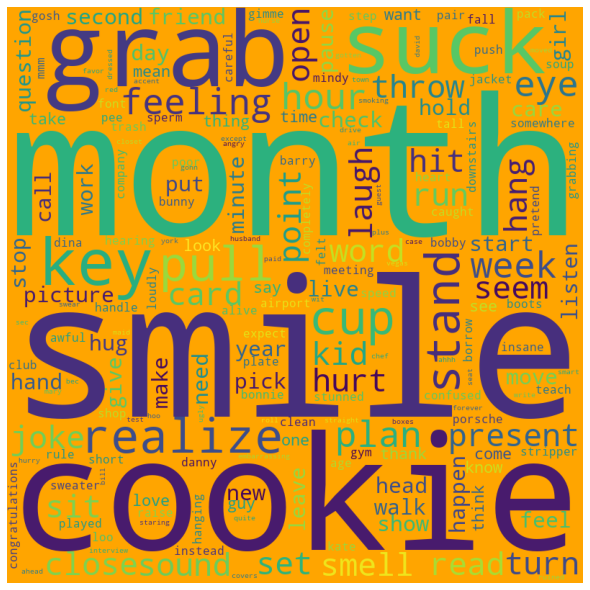

In [40]:
concat = ""
for i in list(sorted_bag2.keys())[-1000:]:
  concat += ' '+i
word_cloud_drawer(concat,name='total',background_color='orange')

Rachel


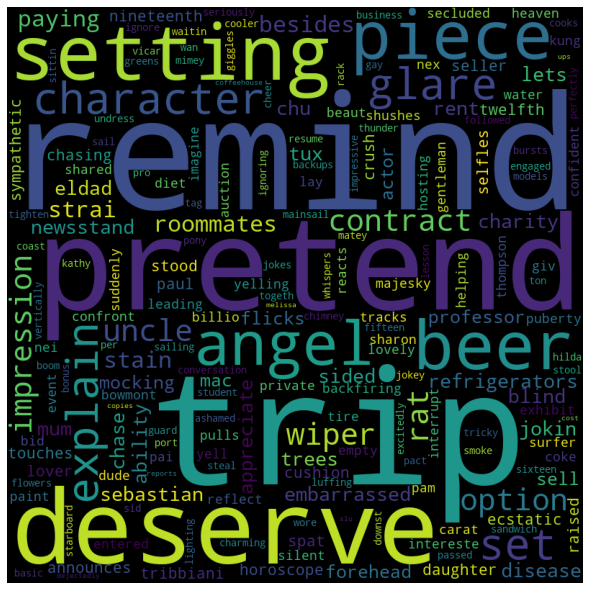

Chandler


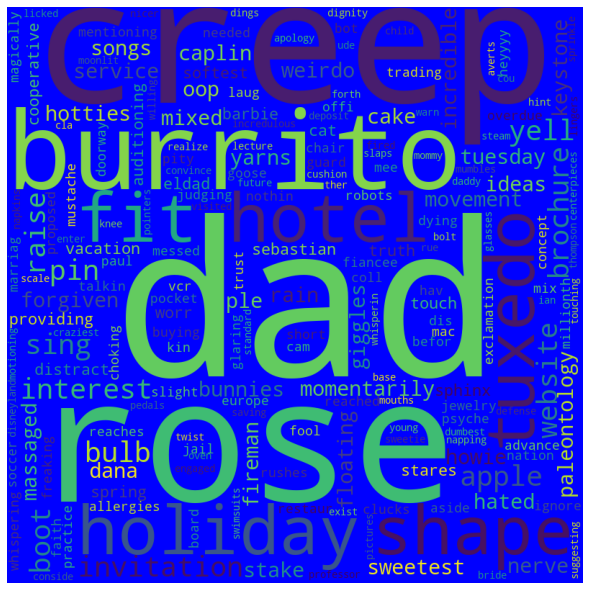

Joey


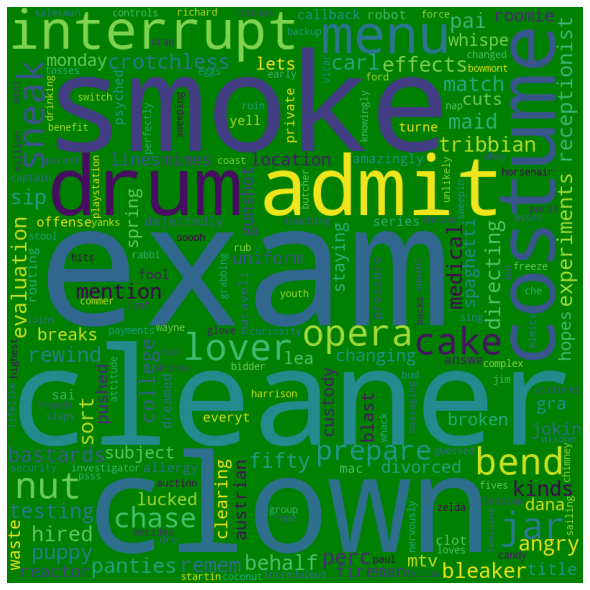

Monica


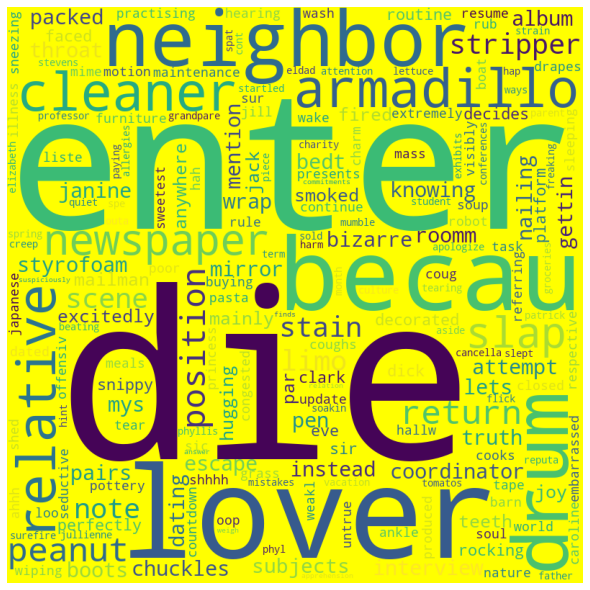

Ross


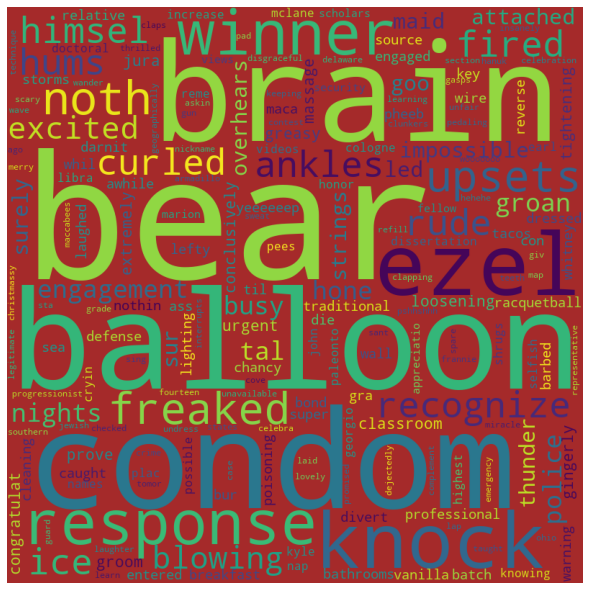

Phoebe


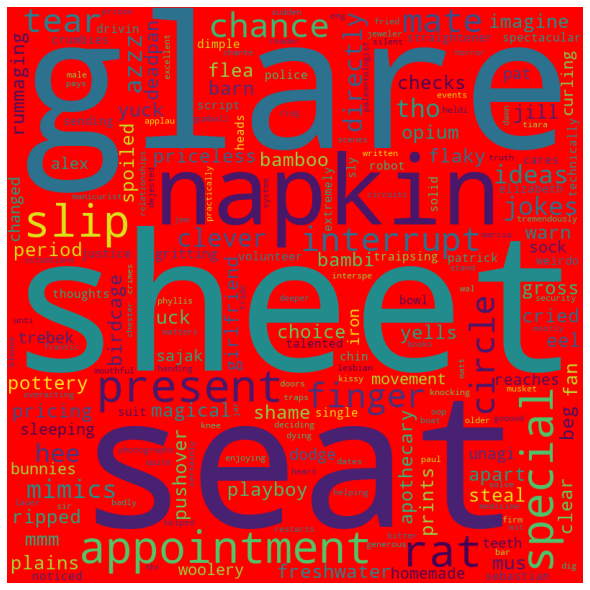

In [41]:
t = -1
color = ['black','blue','green','yellow','brown','red']
for  name in name_actors:
  concat = ""
  print(name)
  bag = word_frequency[name]
  for i in list(bag.keys())[-1000:]:
    concat += ' '+i
  t+=1
  word_cloud_drawer(concat,name=name,background_color=color[t])

# most frequent sentences for each one

<div dir=rtl>
اصولا بازیگران با جملاتشان شناخته می‌شوند و در این مورد نیز بیشترین تکرارها میتوانند حائز اهمیت باشند.

هرچند اکثر موارد پرتکرار جمات تک کلمه ای مانند what? Hey! okey! و ... می‌باشند و به همین دلیل در ادامه موارد با تعیین کف تعداد کلمات نیز آورده شده است.
</div> 

In [64]:
top_freq = {}
for name in name_actors:
  sentences = {}
  top_freq[name]=[]
  for note in alphabetic_dictionary_with_stopwords[name]:
    sentence_list = tokenizer(sentence=note,word_tokenizing=False)
    for sent in  sentence_list:
      try:
        sentences[sent]+=1
      except:
        sentences[sent]=1
  sorted_sentences = dict(sorted(sentences.items(), key=lambda item: item[1]))
  for i in list(sorted_sentences.keys())[-10:]:
    if True or len(i.split())>2:
      top_freq[name].append([i,sorted_sentences[i]])

for i in top_freq.keys():
  print("------------------------------------------------------------------")
  print(i)
  for j in top_freq[i][::-1]:
    print(j)

------------------------------------------------------------------
Rachel
['yeah', 115]
['what', 108]
['okay', 85]
['hey', 58]
['really', 36]
['god', 29]
['huh', 23]
['yes', 23]
['know', 22]
['ross', 18]
------------------------------------------------------------------
Chandler
['hey', 99]
['what', 73]
['okay', 62]
['yeah', 51]
['yes', 24]
['really', 22]
['god', 18]
['all right', 15]
['why', 14]
['entering hey', 14]
------------------------------------------------------------------
Joey
['hey', 101]
['yeah', 95]
['what', 49]
['okay', 31]
['entering hey', 26]
['all right', 18]
['really', 14]
['yes', 13]
['huh', 11]
['sure', 9]
------------------------------------------------------------------
Monica
['what', 86]
['hey', 78]
['okay', 52]
['yeah', 45]
['really', 36]
['god', 22]
['know', 22]
['yes', 20]
['chandler', 13]
['why', 13]
------------------------------------------------------------------
Ross
['yeah', 126]
['what', 98]
['hey', 82]
['okay', 35]
['entering hey', 28]
['huh', 16]
['

In [65]:
top_freq = {}
for name in name_actors:
  sentences = {}
  top_freq[name]=[]
  for note in alphabetic_dictionary_with_stopwords[name]:
    sentence_list = tokenizer(sentence=note,word_tokenizing=False)
    for sent in  sentence_list:
      try:
        sentences[sent]+=1
      except:
        sentences[sent]=1
  sorted_sentences = dict(sorted(sentences.items(), key=lambda item: item[1]))
  for i in list(sorted_sentences.keys())[-1000:]:
    if len(i.split())>1 and sorted_sentences[i]>4:
      top_freq[name].append([i,sorted_sentences[i]])

for i in top_freq.keys():
  print("------------------------------------------------------------------")
  print(i)
  for j in top_freq[i][::-1]:
    print(j)

------------------------------------------------------------------
Rachel
['thank you', 18]
['all right', 13]
['entering hey', 8]
['don know', 7]
------------------------------------------------------------------
Chandler
['all right', 15]
['entering hey', 14]
['why not', 8]
['what are you doing', 7]
['are you serious', 6]
['don know', 6]
['what going', 6]
['that great', 5]
------------------------------------------------------------------
Joey
['entering hey', 26]
['all right', 18]
['why not', 8]
['don know', 6]
['thank you', 6]
['hey pheebs', 5]
------------------------------------------------------------------
Monica
['what are you doing', 11]
['thank you', 11]
['entering hey', 10]
['all right', 7]
['what the matter', 7]
['why not', 7]
['what are you talking about', 6]
['are you okay', 5]
['don know', 5]
['what you mean', 5]
['that great', 5]
['love you', 5]
------------------------------------------------------------------
Ross
['entering hey', 28]
['thank you', 16]
['all right', 1

# NGrams

<div dir=rtl>
یکی از ساده ترین مدل های زبانی بحث NGram ها هستند که عملا رفتار کلامی افراد را آشکار میکنند. هرچند به علت عدم وجود این بخش در سرفصل این تمرین بر آن چندان مانوری داده نشده است و صرفا به کمک آن نمونه جملات پرتکرار با تعداد کلمه معلوم را می‌توان در نظر گرفت.
</div>

In [66]:

class ngrams_plus_frquency:
  def __init__(self,n=2):
    self.n = n
  
  def copute_ngram_for_sentence(self,sentence):
    return ngrams(sentence.split(), self.n)
    
  def compute_ngram_for_list_with_frequency(self,list_):
    out = {}
    for sent in list_:
        if len(sent.split())>self.n:
          ng = ngrams(sent.split(), self.n)
          for gram in ng:
            sent = ' '.join(gram)
            try:
              out[sent]+=1
            except:
              out[sent]=1
    return out

  def return_top_k(self,d,k=5):
    sorted_d = sorted(d.items(), key=lambda x: x[1])
    key_ = sorted_d[::-1]
    out = []
    for i in key_[:k]:
      out.append(i)
    return out


In [67]:
n = 10
npf = ngrams_plus_frquency(n)
for name in name_actors:
  bag = alphabetic_dictionary_with_stopwords[name]
  out = npf.compute_ngram_for_list_with_frequency(bag)
  # print(out)
  out = npf.return_top_k(out,k=5)

  print('-------------------',name,'-------------------')
  for i in out:
    print(i)
  print("")

------------------- Rachel -------------------
('look just look this way the sooner phoebe breaks chan', 2)
('joey look just look this way the sooner phoebe breaks', 2)
('know and joey knows but ross doesn know you have', 2)
('yes know and joey knows but ross doesn know you', 2)
('that girl just spent the entire evening talking your frie', 2)

------------------- Chandler -------------------
('okay okay you win you win can have sex with', 2)
('okay okay okay you win you win can have sex', 2)
('they left okay did you see that with the inappropr', 2)
('after they left okay did you see that with the', 2)
('some boundary issues you know sometimes ask inappropriate questions working', 1)

------------------- Joey -------------------
('sooner die this hellhole then see her back with you', 2)
('would sooner die this hellhole then see her back with', 2)
('they doing out here the coast all the way over', 2)
('are they doing out here the coast all the way', 2)
('what are they doing out here the 

<div dir=rtl>
در این بخش یک نمونه جالب از رفتار افراد مشاهده می‌گردد. چندلر در اکثر موارد یک کلمه را چندین بار تکرار کرده و احتمالا نمونه ‌های از این دست در ذهن مخاطب به سادگی قابل یافتن است.

همچنین تمایل فیبی در گفتن جملات با ضمایر تو در تو در قسمت فوق قابل مشاهده است که در نمونه فیلم نیز زمینه ایجاد طنز در ذهن مخاطب را فراهم می‌آورده است.
</div>

In [68]:
npf = ngrams_plus_frquency(n=5)
for name in name_actors:
  bag = alphabetic_dictionary_with_stopwords[name]
  out = npf.compute_ngram_for_list_with_frequency(bag)
  # print(out)
  out = npf.return_top_k(out,k=5)

  print('-------------------',name,'-------------------')
  for i in out:
    print(i)
  print("")

------------------- Rachel -------------------
('what are you talking about', 9)
('what are you doing here', 5)
('are you talking about you', 4)
('right all right all right', 4)
('all right all right all', 4)

------------------- Chandler -------------------
('dum dum dum dum dum', 6)
('joey joey joey joey joey', 5)
('what are you doing here', 4)
('why why why why why', 3)
('what are you guys doing', 3)

------------------- Joey -------------------
('what are you talking about', 7)
('right all right all right', 6)
('all right all right all', 6)
('and and and and and', 4)
('can talk you for second', 4)

------------------- Monica -------------------
('what are you doing here', 8)
('what are you talking about', 8)
('chandler what are you doing', 3)
('what are you doing you', 3)
('what what are you doing', 3)

------------------- Ross -------------------
('what are you doing here', 7)
('the door and traps chandler', 3)
('opens the door and traps', 3)
('fine opens the door and', 3)
('cry f

chandler is a repeater

In [69]:
npf = ngrams_plus_frquency(n=3)
for name in name_actors:
  bag = alphabetic_dictionary_without_stopwords[name]
  out = npf.compute_ngram_for_list_with_frequency(bag)
  # print(out)
  out = npf.return_top_k(out,k=5)

  print('-------------------',name,'-------------------')
  for i in out:
    print(i)
  print("")

------------------- Rachel -------------------
('okay okay okay', 12)
('whoa whoa whoa', 10)
('hey hey hey', 9)
('wait minute wait', 7)
('minute wait minute', 6)

------------------- Chandler -------------------
('whoa whoa whoa', 11)
('joey joey joey', 11)
('hey hey hey', 10)
('dum dum dum', 8)
('stop stop stop', 4)

------------------- Joey -------------------
('whoa whoa whoa', 21)
('hey hey hey', 16)
('look look look', 12)
('wait wait wait', 8)
('right right right', 7)

------------------- Monica -------------------
('phone hello listens', 7)
('wait wait wait', 5)
('ooh baby baby', 4)
('baby ooh baby', 3)
('say good bye', 3)

------------------- Ross -------------------
('whoa whoa whoa', 12)
('wait wait wait', 10)
('okay okay okay', 9)
('yes yes yes', 8)
('blah blah blah', 5)

------------------- Phoebe -------------------
('wait wait wait', 12)
('please please please', 7)
('know know know', 4)
('starts walk away', 4)
('yes yes yes', 4)



In [70]:
npf = ngrams_plus_frquency(n=2)
for name in name_actors:
  bag = alphabetic_dictionary_without_stopwords[name]
  out = npf.compute_ngram_for_list_with_frequency(bag)
  # print(out)
  out = npf.return_top_k(out,k=5)

  print('-------------------',name,'-------------------')
  for i in out:
    print(i)
  print("")

------------------- Rachel -------------------
('okay okay', 53)
('well know', 52)
('know know', 51)
('wait minute', 40)
('yeah know', 39)

------------------- Chandler -------------------
('okay okay', 28)
('well know', 25)
('whoa whoa', 23)
('hey hey', 22)
('yeah well', 22)

------------------- Joey -------------------
('hey hey', 64)
('yeah yeah', 52)
('whoa whoa', 50)
('hey guys', 27)
('entering hey', 26)

------------------- Monica -------------------
('wait minute', 21)
('hey guys', 17)
('wait wait', 16)
('hey rach', 14)
('okay okay', 13)

------------------- Ross -------------------
('okay okay', 60)
('yeah yeah', 37)
('yes yes', 36)
('hey hey', 32)
('whoa whoa', 31)

------------------- Phoebe -------------------
('yeah know', 29)
('wait wait', 26)
('know know', 25)
('hey guys', 20)
('okay okay', 19)



# Speaker Recognition + Naive Bayes

<div dir=rtl>
به عنوان بخش پایانی سعی شد یک تسک قابل ارزیابی تعریف و پیاده سازی گردد.

گرچه در موارد فوق نیز سعی شده بود رفتار هر فرد مانند جملات تکراری یا کلمات پر تکرار استخراج گردند اما در ادامه نیز تسکی مبنی بر تشخیص گوینده و تشخیص جنسیت گوینده تهیه گردیده است که برای پیاده سازی آن از قواعد naive bayes استغاده شده است.

لازم به ذکر است در پیاده سازی این بخش نیز از کدها و سایت های مختل ایده گرفته شده است که از جمله آن می‌توان به geeksforgeeks اشاره نمود.
</div>

In [166]:
dataset = []
y = []
for name in name_actors:
  bag = alphabetic_dictionary_with_stopwords[name]
  for sent in bag:
    dataset.append([sent,name])
    # y.append()

random.shuffle(dataset)
nltk.download('stopwords')
corpus = []

for i in range(len(dataset)):
  text = dataset[i][0]
  y.append(dataset[i][1])
  ps = PorterStemmer()
  text = ''.join(text)
  corpus.append(text)

# creating bag of words model
cv = CountVectorizer(max_features = 150000)
X = cv.fit_transform(corpus).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [167]:
print(len(X),len(X[0]),len(y))

36372 9941 36372


In [168]:
ltrain = int(len(X) *0.8)
ltest = len(X) - ltrain
X_train, X_test, y_train, y_test = X[:ltrain] , X[ltrain:] , y[:ltrain] , y[ltrain:]

In [169]:
classifier = GaussianNB();
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

n1 = np.array(y_test)
n2 = np.array(y_pred)
acc = round(100*sum(n1==n2)/len(n1),2)

print(acc)

21.33


In [170]:
classifier = BernoulliNB();
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

n1 = np.array(y_test)
n2 = np.array(y_pred)
acc = round(100*sum(n1==n2)/len(n1),2)

print(acc)

28.3


In [171]:
# fitting naive bayes to the training set
classifier = MultinomialNB();
classifier.fit(X_train, y_train)

# predicting test set results
y_pred = classifier.predict(X_test)

# making the confusion matrix
n1 = np.array(y_test)
n2 = np.array(y_pred)
acc = round(100*sum(n1==n2)/len(n1),2)

print(acc)

28.22


In [188]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
name_actors

['Rachel', 'Chandler', 'Joey', 'Monica', 'Ross', 'Phoebe']

<div dir=rtl>
تابع زیر برای دستیابی به هدف مذکور تهیه گردیده است که البته به صورت چند بلوکی نمونه های آن در بخش های فوق مشاهده شد .

در این مورد تلاش شده تا انتخاب تعداد افراد ارزشمند باشد که در دو نمونه ۶ شخصیتی و ۲ شخصیتی بررسی گردیده است.

همچنین تعداد فیچر های بازنمایی حائز اهمیت هستند. که در تعداد های مختلف مانند و۵۰و۰۰و....و۵۰۰۰۰۰۰ تست شده اند.

همجنین از سه کرنل با توابع بر مبنای برنولی گوسی و مالتینومیال استفاده شده است.
</div>

In [201]:
def naive_bayes_(function_name_,num_of_feature,task,number_of_classes = 6):
  dataset = []
  y = []
  for name in name_actors[:number_of_classes]:
    bag = alphabetic_dictionary_with_stopwords[name]
    if task == 'gender':
      for sent in bag:
        if name in ['Rachel','Monica','Phoebe']:
          dataset.append([sent,1])
        else:
          dataset.append([sent,0])
    else:
      for sent in bag:
          dataset.append([sent,name])

  random.shuffle(dataset)
  
  corpus = []
  for i in range(len(dataset)):
    text = dataset[i][0]
    y.append(dataset[i][1])
    ps = PorterStemmer()
    text = ''.join(text)
    corpus.append(text)
  cv = CountVectorizer(max_features = num_of_feature)
  X = cv.fit_transform(corpus).toarray()

  if function_name_ == 'BernoulliNB':
    classifier = BernoulliNB()#function
  elif function_name_ == "MultinomialNB":
    classifier = MultinomialNB()#function
  else:
    classifier = GaussianNB()

  ltrain = int(len(X) *0.8)
  X_train, X_test, y_train, y_test = X[:ltrain] , X[ltrain:] , y[:ltrain] , y[ltrain:]

  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  n1 = np.array(y_test)
  n2 = np.array(y_pred)
  acc = round(100*sum(n1==n2)/len(n1),2)
  return acc

بر مبنای تضخیص افراد برای هر ۶ شخصیت
خروجی تا ۲۸ درصد

In [216]:
#task = "gender"
outBN = []
outMN = []
outG = []

for i in [5,50,500,5000,50000,500000,5000000]:
  outMN.append(naive_bayes_(function_name_="MultinomialNB",num_of_feature=i,task='.'))
  outBN.append(naive_bayes_(function_name_="BernoulliNB",num_of_feature=i,task='.'))
  outG.append(naive_bayes_(function_name_="GaussianNB",num_of_feature=i,task='.'))

print(outMN)
print(outBN)
print(outG)

[19.16, 21.2, 25.32, 28.43, 28.01, 28.59, 27.71]
[18.13, 22.31, 25.42, 27.45, 27.15, 28.11, 28.29]
[18.64, 21.06, 22.69, 20.7, 21.11, 20.21, 20.95]


بهترین نمونه مالتینومیال

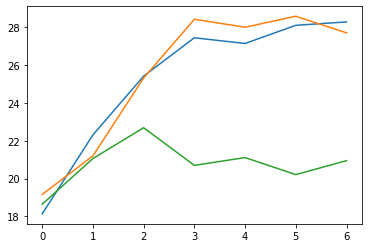

In [217]:
plt.plot(range(len(outBN)),outBN)
plt.plot(range(len(outBN)),outMN)
plt.plot(range(len(outBN)),outG)
plt.show()

بر مبنای تشخیص جنسیت افراد و برای هر شش نفر تا حدود ۶۰ درصد در دو مدل مالتی نومیال و برنولی

In [214]:
#task = "gender"
outBN = []
outMN = []
outG = []

for i in [5,50,500,5000,50000,500000,5000000]:
  outMN.append(naive_bayes_(function_name_="MultinomialNB",num_of_feature=i,task='gender'))
  outBN.append(naive_bayes_(function_name_="BernoulliNB",num_of_feature=i,task='gender'))
  outG.append(naive_bayes_(function_name_="GaussianNB",num_of_feature=i,task='gender'))

print(outMN)
print(outBN)
print(outG)

[51.27, 54.34, 56.47, 59.15, 59.2, 58.46, 59.81]
[49.87, 54.3, 56.96, 59.66, 58.46, 58.2, 59.13]
[50.87, 52.63, 53.36, 54.21, 51.42, 52.98, 52.66]


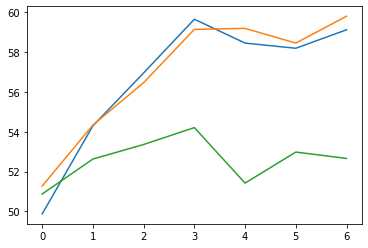

In [215]:
plt.plot(range(len(outBN)),outBN)
plt.plot(range(len(outBN)),outMN)
plt.plot(range(len(outBN)),outG)
plt.show()

بر اساس تشخیص شخصیت برای ۲ نفر تا حدود ۶۳ درصد  بهترین خروجی برای مولتی نومیال

In [218]:
#task = "gender"
outBN = []
outMN = []
outG = []

for i in [5,50,500,5000,50000,500000,5000000,5000000,50000000]:
  outMN.append(naive_bayes_(function_name_="MultinomialNB",num_of_feature=i,task='.',number_of_classes = 2))
  outBN.append(naive_bayes_(function_name_="BernoulliNB",num_of_feature=i,task='.',number_of_classes = 2))
  outG.append(naive_bayes_(function_name_="GaussianNB",num_of_feature=i,task='.',number_of_classes = 2))

print(outMN)
print(outBN)
print(outG)

[54.25, 54.02, 60.73, 61.54, 62.36, 61.97, 62.95, 63.38, 62.17]
[53.82, 56.01, 61.27, 61.54, 62.05, 60.96, 62.95, 60.06, 59.98]
[53.16, 52.96, 56.71, 57.49, 57.8, 56.47, 55.77, 56.36, 57.68]


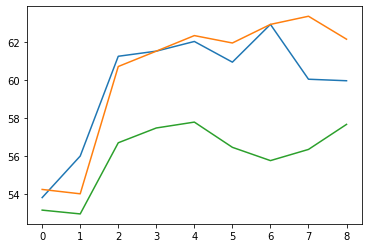

In [219]:
plt.plot(range(len(outBN)),outBN)
plt.plot(range(len(outBN)),outMN)
plt.plot(range(len(outBN)),outG)
plt.show()

برای ۲ شخصیت و برای تشخیص جنسیت مجددا در حودد ۶۰ درصد  و بهترین برای مالتی نومیال

In [210]:
#task = "gender"
outBN = []
outMN = []
outG = []

for i in [5,50,500,5000,50000,500000,5000000,50000000]:
  outMN.append(naive_bayes_(function_name_="MultinomialNB",num_of_feature=i,task='gender',number_of_classes = 2))
  outBN.append(naive_bayes_(function_name_="BernoulliNB",num_of_feature=i,task='gender',number_of_classes = 2))
  outG.append(naive_bayes_(function_name_="GaussianNB",num_of_feature=i,task='gender',number_of_classes = 2))

print(outMN)
print(outBN)
print(outG)

[55.3, 55.81, 57.68, 60.37, 61.31, 61.66, 62.4, 61.74]
[53.82, 57.96, 61.43, 61.35, 61.82, 61.23, 62.17, 61.7]
[52.65, 53.0, 57.92, 57.61, 58.39, 55.97, 57.45, 58.11]


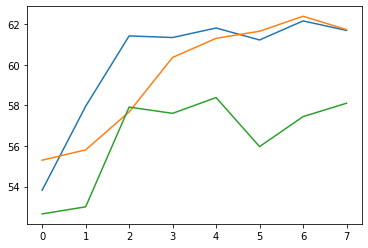

In [211]:
plt.plot(range(len(outBN)),outBN)
plt.plot(range(len(outBN)),outMN)
plt.plot(range(len(outBN)),outG)
plt.show()

# use pos for finding if they are positive or negative

In [ ]:
adj_list = {}
for name in name_actors:
  tagged_list[name] = []
  for note in alphabetic_dictionary_with_stopwords[name]:
    tagged = pos(note,manage_stopwords=False)
    tagged_list[name].append(tagged)

In [60]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [85]:
def pos_neg_jj(name):
  user_jj_p = 0
  user_jj_n = 0
  c = 0
  for i in tagged_list[name]:
    for j in i:
      if j[1]=='JJ':
          user_jj_p += sia.polarity_scores(j[0])['pos']
          user_jj_n += sia.polarity_scores(j[0])['neg']
          c+=1
  return(int(100 * user_jj_p / (user_jj_p+user_jj_n)))

Rachel 74
Chandler 71
Joey 75
Monica 71
Ross 72
Phoebe 76


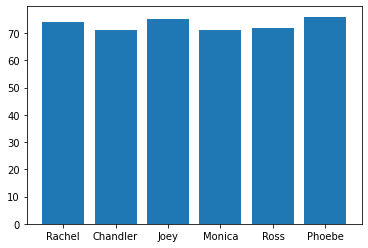

In [86]:
y = []
for i in name_actors:
  pn = pos_neg_jj(i)
  print(i,pn)
  y.append(pn)

plt.bar(name_actors,y)
plt.show()

In [54]:
# def pos_neg_jj(name):
#   ross_jj_p = 0
#   # ross_jj_n = 0
#   c = 0
#   for i in tagged_list[name]:
#     for j in i:
#       if j[1]=='JJ':
#           ross_jj_p += sia.polarity_scores(j[0])['pos']
#           ross_jj_n += sia.polarity_scores(j[0])['neg']
#           c+=1
#   return(int(100 * ross_jj_p / (ross_jj_p+ross_jj_n)))

{'compound': 0.7177, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}

In [96]:
def pos_neg_all(name):
  user_jj_p = user_jj_n = 0 
  c = 0
  for note in alphabetic_dictionary_with_stopwords[name]:
    c+=1
    user_jj_p += sia.polarity_scores(note)['pos']
    user_jj_n += sia.polarity_scores(note)['neg']
  return(int(100 * user_jj_p / (user_jj_p+user_jj_n)))

Rachel 79
Chandler 77
Joey 78
Monica 77
Ross 79
Phoebe 79


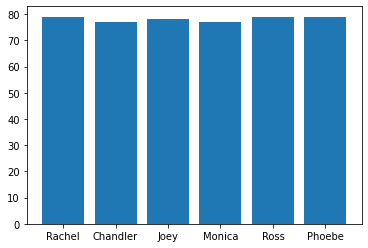

In [97]:
y = []
for i in name_actors:
  pn = pos_neg_all(i)
  print(i,pn)
  y.append(pn)

plt.bar(name_actors,y)
plt.show()

In [110]:
#using compuond
def pos_neg_all_2(name):
  user_jj_p = user_jj_n = 0 
  c = 0
  for note in alphabetic_dictionary_with_stopwords[name]:
    c+=1
    x = sia.polarity_scores(note)['compound']
    user_jj_n += -0.5 > x
    user_jj_p += 0.5 < x
    
  return(int(100 * user_jj_p / c))


Rachel 14
Chandler 13
Joey 14
Monica 12
Ross 13
Phoebe 15


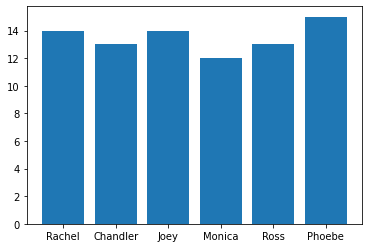

In [111]:
y = []
for i in name_actors:
  pn = pos_neg_all_2(i)
  print(i,pn)
  y.append(pn)

plt.bar(name_actors,y)
plt.show()